In [1]:
from pathlib import Path

name = "librispeech-dev-clean"
in_dir = Path("data/dev-clean")
align_dir = Path("data/alignments/dev-clean")
feat_dir = Path("features")
audio_ext = ".flac" 

In [2]:
from encode import sample_files
from utils.features import DataSet

dataset = DataSet(
    name, in_dir, align_dir, feat_dir, audio_ext 
)

sample_size = 500
gamma = 0.2
out_dir_dusted = Path(f"output/dusted/{sample_size}")

sampled_paths = sample_files(dataset, sample_size)
print(len(sampled_paths))

500


In [ ]:
from encode import get_units
from joblib import Parallel, delayed

results = Parallel(n_jobs=2)([
    delayed(get_units)(dataset, "dusted", sampled_paths, gamma, True),  
])

dusted_words = results[0]

In [ ]:
from utils.features import load_units_from_paths
from joblib import Parallel, delayed

results = Parallel(n_jobs=2)([
    delayed(load_units_from_paths)(dataset, "dusted", sampled_paths, gamma=0.2),  
])

dusted_words = results[0]

In [ ]:
from distance import calculate_distance

# If calculate_distance is called with only the words, it does not save the matrices
dist_mat_dusted = calculate_distance(dusted_words, out_dir_dusted, 8)

Calculating Distances:   0%|          | 168/70513750 [00:29<3160:32:20,  6.20it/s]Process ForkPoolWorker-5:
Process ForkPoolWorker-7:
Process ForkPoolWorker-1:
Process ForkPoolWorker-4:
Process ForkPoolWorker-6:
Process ForkPoolWorker-8:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/pytho

In [3]:
from utils.features import get_words_and_dist_mat

dusted_words, dist_mat_dusted = get_words_and_dist_mat(dataset, "dusted", out_dir_dusted, sample_size, gamma)

Getting dusted words: 11876it [01:51, 106.86it/s]


In [4]:
from utils.features import display_words

true_words = display_words(dusted_words)

Sorted Word Counts


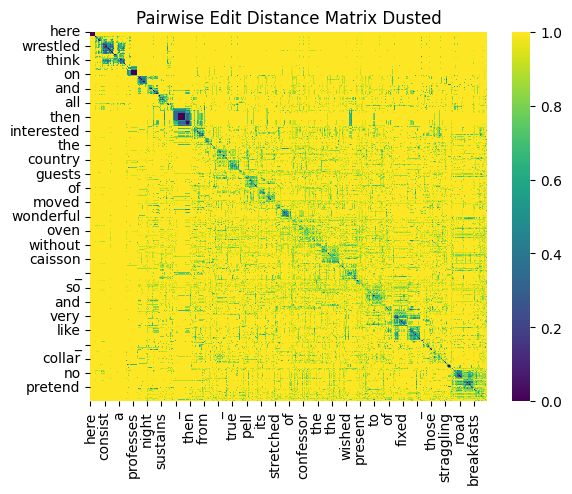

In [5]:
from eval import pairwise_edit_dist_mat

# Visualise the distances
pairwise_edit_dist_mat(dist_mat_dusted, "Pairwise Edit Distance Matrix Dusted", true_words)

In [6]:
from cluster import cluster, get_word_clusters

# Get the int_clusters for each of the matrices
dust_clusters = cluster(dist_mat_dusted, 0.2)

# Convert these to word clusters
dust_word_clusters = get_word_clusters(dust_clusters, dusted_words)

Clustering: 100%|██████████| 11876/11876 [00:00<00:00, 55610.88it/s]
Getting Word Clusters: 7848it [00:03, 2518.80it/s]


In [ ]:
from cluster import get_loaded_clusters

dust_word_clusters = get_loaded_clusters(dusted_words)

In [8]:
from eval import ned

# Compute the ned for my dusted and hubert clusters - atm my NED is computed only using clusters with > 1 words
ned_dusted = ned(dust_word_clusters, print_pure=False, print_inpure=True)
print(f"DUSTED NED: {ned_dusted}")

Calculating NED: 7848it [00:00, 203395.38it/s]

Cluster 7: 0.3333333333333333
her, for, for, for, for, for, for, for, for, for, for, for

Cluster 8: 0.10344827586206896
not, not, not, not, not, not, not, not, not, not, knock, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not, not

Cluster 21: 2
and, in

Cluster 35: 1.8095238095238095
man, men, man, then, man, them, man

Cluster 36: 2
a, of

Cluster 40: 0.12121212121212122
of, of, of, of, of, of, of, of, of, of, of, of, of, of, of, of, of, of, a, of, of, of, of, of, of, of, of, of, of, of, of, of, of

Cluster 48: 1.1587301587301588
but, with, which, with, which, with, with, which, which, which, which, which, which, which, which, which, which, which, which, which, with, rich, which, which, which, with, with, which

Cluster 51: 1.3333333333333333
and, and, in

Cluster 54: 0.18929110105580693
a, a, a, a, a, a, 

In [ ]:
from cluster import get_best_clusters

ned_dusted, duplicate_count_dusted, dust_word_clusters = get_best_clusters(dust_word_clusters, ned_dusted, max_iter=5)

Iteration 0: NED: 0.066423, Duplicates: 5351


Calculating Cluster Centroids: 7848it [00:00, 20143.71it/s]
Calculating NED: 7848it [00:00, 364544.36it/s]


Iteration 1: NED: 0.041387


Calculating Cluster Centroids: 7848it [00:00, 19781.12it/s]
Calculating NED: 7848it [00:00, 378816.69it/s]

Iteration 2: NED: 0.046181
Converged early due to no significant improvement in NED or duplicate count.
Best NED: 0.041387, Best Duplicates: 5295


In [15]:
from utils.features import store_words

# Store words associated with these clusters
store_words(dust_word_clusters, out_dir_dusted)

Wrote words to output/dusted/500/words.csv


In [16]:
from eval import words_from_word_units, clusters_purity
            
dust_just_words_clusters = words_from_word_units(dust_word_clusters)
inpurity, total = clusters_purity(dust_just_words_clusters)
print(f"{total} Dusted Clusters with inpurity: {round(inpurity*100, 3)}%")

7848 Dusted Clusters with inpurity: 63.812%


In [17]:
from eval import calculate_duplicate_clusters

cluster_counts_dusted, duplicate_counts_dusted = calculate_duplicate_clusters(dust_word_clusters, print_clusters=True)

Total duplicate clusters (considering word frequency): 5295
Duplicate clusters and their counts:
{'the': 2}: 19 times
{'merely': 1}: 4 times
{'by': 1}: 22 times
{'her': 2}: 7 times
{'_': 1}: 305 times
{'the': 3}: 13 times
{'but': 1}: 52 times
{'and': 1, 'in': 1}: 5 times
{'that': 1}: 84 times
{'_': 2}: 46 times
{'of': 1}: 80 times
{'passions': 1}: 2 times
{'a': 1, 'of': 1}: 2 times
{'and': 1}: 133 times
{'have': 2}: 3 times
{'under': 1}: 6 times
{'friend': 1}: 6 times
{'any': 2}: 3 times
{'true': 1}: 5 times
{'to': 1}: 105 times
{'mark': 1}: 2 times
{'and': 2, 'in': 1}: 3 times
{'more': 2}: 2 times
{'old': 1}: 10 times
{'her': 1}: 26 times
{'years': 1}: 3 times
{'and': 4}: 4 times
{'ago': 1}: 2 times
{'_': 4}: 17 times
{'with': 1}: 31 times
{'received': 1}: 2 times
{'egypt': 1}: 3 times
{'arms': 1}: 4 times
{'had': 1}: 68 times
{'lived': 1}: 3 times
{'_': 5}: 15 times
{'three': 1}: 9 times
{'who': 2}: 2 times
{'a': 2}: 9 times
{'long': 1}: 4 times
{'there': 1}: 24 times
{'comfortably':

In [13]:
from encode import sample_files

query_path = sample_files(dataset, sample_size=1)

# Query one of the ladys
query_path = [Path("data/dev-clean/174/50561/174-50561-0013.flac")]

from utils.features import load_units_from_paths

query_dusted_words = load_units_from_paths(dataset, "dusted", query_path)
query_dusted_sentence = " ".join([w.true_word for w in query_dusted_words])

from cluster import get_distance_to_centroids, get_cluster_centroids

dust_centroids = get_cluster_centroids(dust_word_clusters)
query_dusted_words = get_distance_to_centroids([query_dusted_words], dust_centroids)

import editdistance
import statistics

predictions = []
query_distances = []
for word in query_dusted_words:
    prediction = dust_centroids[word.cluster_id].true_word
    query_distances.append(editdistance.eval(word.true_word, prediction)/max(len(word.true_word), len(prediction)))
    predictions.append(prediction)

prediction_sentence = " ".join(predictions)
print(f"NED for query: {statistics.mean(query_distances)}")
print(query_dusted_sentence)
print(prediction_sentence)

Loading Units: 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]
Calculating Cluster Centroids: 7848it [00:00, 20220.32it/s]


NED for query: 0.22453703703703703
_ now _ my _ on the my _ fair lawn bough _ _ and i'll lady apple play _ so lady _ lady neath you dream shady the for gold o apple you lady shall
_ now _ my _ on the my in fair long bath _ _ in i lady apple bay _ so lady _ me need you dream jetty the her old oh apple you lady shall
